   Invoice StockCode                          Description  Quantity  \
0   489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1   489434    79323P                   PINK CHERRY LIGHTS        12   
2   489434    79323W                  WHITE CHERRY LIGHTS        12   
3   489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4   489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

      InvoiceDate  Price  Customer ID         Country  TotalPrice  
0  12/1/2009 7:45   6.95      13085.0  United Kingdom        83.4  
1  12/1/2009 7:45   6.75      13085.0  United Kingdom        81.0  
2  12/1/2009 7:45   6.75      13085.0  United Kingdom        81.0  
3  12/1/2009 7:45   2.10      13085.0  United Kingdom       100.8  
4  12/1/2009 7:45   1.25      13085.0  United Kingdom        30.0  
(407664, 9)
Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407664 entries, 0 to 407663
Data columns (total 9 columns):
 #   Column       Non-Null Count

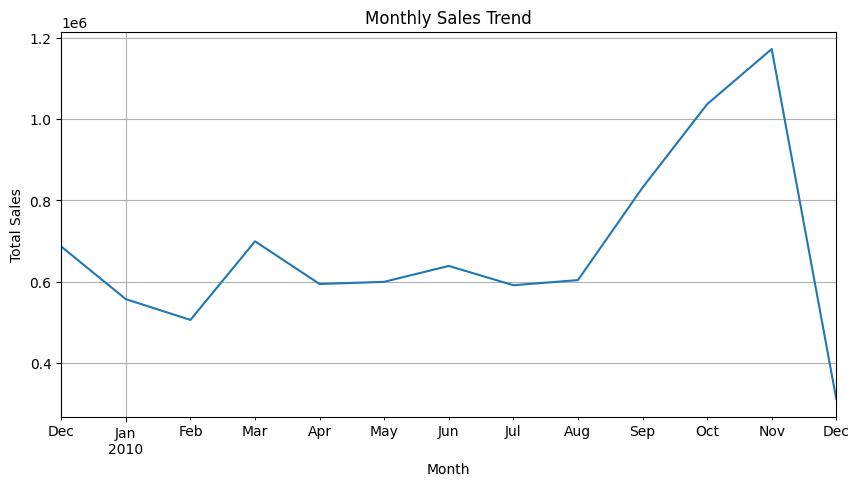

In [4]:
import pandas as pd
df_cleaned=pd.read_csv('cleaned_online_retail.csv')
print(df_cleaned.head())
print(df_cleaned.shape)
#Check basic info and data types
print("Data Info:")
print(df_cleaned.info())

# 2. Summary statistics for numeric columns
print("\nSummary Statistics:")
print(df_cleaned.describe())

# 3. Unique countries in the data
countries = df_cleaned['Country'].unique()
print(f"\nUnique countries ({len(countries)}):")
print(countries)

# 4. Total sales per country
sales_by_country = df_cleaned.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)
print("\nTotal Sales by Country:")
print(sales_by_country)

# 5. Top 10 customers by total purchase value
top_customers = df_cleaned.groupby('Customer ID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

print("\nTop 10 Customers by Purchase Value:")
print(top_customers)

# 6. Most popular products (by Quantity sold)
top_products = df_cleaned.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products)

# 7. Sales trend over time - monthly sales
# Convert InvoiceDate to datetime if not already
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'], errors='coerce')

# Now you can use .dt accessor safely
df_cleaned['InvoiceMonth'] = df_cleaned['InvoiceDate'].dt.to_period('M')

# Group by month and get monthly sales
monthly_sales = df_cleaned.groupby('InvoiceMonth')['TotalPrice'].sum()
print("\nMonthly Sales Trend:")
print(monthly_sales)


# visualising the data which in which month products are high 
import matplotlib.pyplot as plt

monthly_sales.plot(kind='line', figsize=(10,5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()